In [1]:
import numpy as np
import numpy.random as rnd
import time
import pylab as plt

In [2]:
#Length of match
match_minutes = 90
#Average goals per match
goals_per_match = 2.79

#Probability of a goal per minute
prob_per_minute = np.array(goals_per_match/match_minutes)
print('The probability of a goal per minute is %5.5f. \n' % prob_per_minute )

The probability of a goal per minute is 0.03100. 



In [3]:
#Count of the number of goals
goals=0

for minute in range(match_minutes):

  #Generate a random number between 0 and 1.
  r=rnd.rand(1,1)

  #Prints an X when there is a goal and a zero otherwise.
  if (r < prob_per_minute):
    #Goal - if the random number is less than the goal probability.
    print('X', end = ' ')
    goals=goals+1
    time.sleep(1)  #Longer pause
  else:
    print('o', end = ' ')
    time.sleep(0.1)  #Short pause
print('\n')
print('Final whistle. \n \nThere were ' + str(goals) + ' goals.')

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o 

Final whistle. 
 
There were 3 goals.


In [4]:
# we now simulate 380 matches of a football season and look at how well it predicts the distribution of the number of goals. 
# we loop over 380 matchesstore the number of goals for each match in array and then we make a histogram of the number of goals.

def simulateMatch(n, p):
  # n - number of time units
  # p - probability per time unit of a goal

  # Count the number of goals
  goals = 0

  for minute in range(n):
      # Generate a random number between 0 and 1.
      r = rnd.rand(1, 1)
      # Prints an X when there is a goal and a zero otherwise.
      if (r < p):
        # Goal - if the random number is less than the goal probability.
        goals = goals + 1

  return goals

# Number of matches
num_matches = 380

# Loop over all the matches and print the number of goals.
goals = np.zeros(num_matches)
for i in range(num_matches):
  goals[i] = simulateMatch(match_minutes, prob_per_minute)
  print('In match ' + str(i+1) + ' there were ' + str(int(goals[i])) + ' goals.')

In match 1 there were 5 goals.
In match 2 there were 1 goals.
In match 3 there were 0 goals.
In match 4 there were 0 goals.
In match 5 there were 5 goals.
In match 6 there were 3 goals.
In match 7 there were 5 goals.
In match 8 there were 2 goals.
In match 9 there were 4 goals.
In match 10 there were 6 goals.
In match 11 there were 2 goals.
In match 12 there were 4 goals.
In match 13 there were 5 goals.
In match 14 there were 1 goals.
In match 15 there were 2 goals.
In match 16 there were 2 goals.
In match 17 there were 3 goals.
In match 18 there were 2 goals.
In match 19 there were 2 goals.
In match 20 there were 8 goals.
In match 21 there were 7 goals.
In match 22 there were 2 goals.
In match 23 there were 2 goals.
In match 24 there were 1 goals.
In match 25 there were 1 goals.
In match 26 there were 4 goals.
In match 27 there were 2 goals.
In match 28 there were 4 goals.
In match 29 there were 7 goals.
In match 30 there were 0 goals.
In match 31 there were 2 goals.
In match 32 there

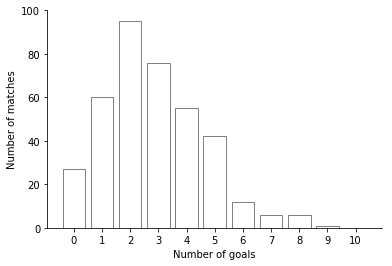

In [5]:
 # Create a histogram

fig, ax = plt.subplots(num=1)

histogram_range = np.arange(-0.5, 10.51, 1)
histogram_goals = np.histogram(goals, histogram_range)

ax.bar(histogram_goals[1][:-1] + 0.5, histogram_goals[0], color='white', edgecolor='black', linestyle='-', alpha=0.5)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0, 11, step=1))
ax.set_yticks(np.arange(0, 101, step=20))
ax.set_xlabel('Number of goals')
ax.set_ylabel('Number of matches')
plt.show()

In [169]:
# importing the tools required for the Poisson regression model

import pandas as pd
import numpy as np
from scipy.stats import poisson,skellam

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn

In [685]:
df_shots = pd.read_csv('../data/Assignment 3/Understat/shots_epl_19-20.csv')

df_shots['h_team'].replace('Manchester United','Man United',inplace=True)
df_shots['h_team'].replace('Newcastle United','Newcastle',inplace=True)
df_shots['h_team'].replace('Manchester City','Man City',inplace=True)
df_shots['h_team'].replace('Wolverhampton Wanderers','Wolves',inplace=True)
df_shots['h_team'].replace('West Bromwich Albion','West Brom',inplace=True)

df_shots['a_team'].replace('Manchester United','Man United',inplace=True)
df_shots['a_team'].replace('Newcastle United','Newcastle',inplace=True)
df_shots['a_team'].replace('Manchester City','Man City',inplace=True)
df_shots['a_team'].replace('Wolverhampton Wanderers','Wolves',inplace=True)
df_shots['a_team'].replace('West Bromwich Albion','West Brom',inplace=True)

df_shots.head(22)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,309897.0,15.0,MissedShots,0.883,0.713,0.053779,Andrew Robertson,h,1688.0,OpenPlay,2019.0,LeftFoot,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Divock Origi,Pass
1,309898.0,18.0,Goal,0.933,0.367,0.366817,Mohamed Salah,h,1250.0,OpenPlay,2019.0,LeftFoot,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Roberto Firmino,Pass
2,309901.0,27.0,Goal,0.922,0.511,0.105316,Virgil van Dijk,h,833.0,FromCorner,2019.0,Head,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Mohamed Salah,Cross
3,309902.0,30.0,SavedShot,0.878,0.555,0.112044,Roberto Firmino,h,482.0,OpenPlay,2019.0,LeftFoot,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Trent Alexander-Arnold,Cross
4,309904.0,41.0,Goal,0.891,0.530,0.258252,Divock Origi,h,484.0,OpenPlay,2019.0,Head,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Trent Alexander-Arnold,Chipped
5,309905.0,46.0,BlockedShot,0.848,0.694,0.045728,Roberto Firmino,h,482.0,OpenPlay,2019.0,LeftFoot,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Andrew Robertson,Pass
6,309906.0,47.0,SavedShot,0.875,0.530,0.126691,Jordan Henderson,h,605.0,OpenPlay,2019.0,RightFoot,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Divock Origi,Cross
7,309907.0,47.0,ShotOnPost,0.964,0.542,0.685405,Roberto Firmino,h,482.0,OpenPlay,2019.0,LeftFoot,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Trent Alexander-Arnold,Pass
8,309908.0,53.0,MissedShots,0.880,0.339,0.077992,Mohamed Salah,h,1250.0,OpenPlay,2019.0,LeftFoot,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Fabinho,BallRecovery
9,309909.0,54.0,BlockedShot,0.849,0.418,0.105522,Jordan Henderson,h,605.0,OpenPlay,2019.0,RightFoot,11643.0,Liverpool,Norwich,4.0,1.0,2019-08-09 20:00:00,Mohamed Salah,Pass


In [686]:
df_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9427 non-null   float64
 1   minute           9427 non-null   float64
 2   result           9427 non-null   object 
 3   X                9427 non-null   float64
 4   Y                9427 non-null   float64
 5   xG               9427 non-null   float64
 6   player           9427 non-null   object 
 7   h_a              9427 non-null   object 
 8   player_id        9427 non-null   float64
 9   situation        9427 non-null   object 
 10  season           9427 non-null   float64
 11  shotType         9427 non-null   object 
 12  match_id         9427 non-null   float64
 13  h_team           9427 non-null   object 
 14  a_team           9427 non-null   object 
 15  h_goals          9427 non-null   float64
 16  a_goals          9427 non-null   float64
 17  date          

In [687]:
df_shots[df_shots.h_a == 'h'].groupby(['match_id','h_team'])['xG'].sum().reset_index()

,match_id,h_team,xG
0,11643.0,Liverpool,2.236117
1,11644.0,West Ham,1.200303
2,11645.0,Bournemouth,1.934554
3,11646.0,Burnley,0.909241
4,11647.0,Crystal Palace,0.871590
...,...,...,...
375,12018.0,Leicester,0.754668
376,12019.0,Everton,1.746987
377,12020.0,Crystal Palace,1.040496
378,12021.0,Chelsea,1.159378


In [688]:
def calc_team_xG(df_shots, metric=None, metric_value=None):
    if metric:
        home_xg_df = pd.DataFrame(df_shots[(df_shots.h_a == 'h') & (df_shots[metric] == metric_value)].groupby(['match_id','h_team'])['xG'].sum().reset_index())
        home_xg_df.rename(columns={'xG': f'home_{metric_value}_xG'}, inplace=True)
        df_shots = df_shots.merge(home_xg_df, left_on=['match_id','h_team'], right_on=['match_id','h_team'], how='left')
        df_shots[f'home_{metric_value}_xG'] = df_shots[f'home_{metric_value}_xG'].replace(np.nan, 0)
        away_xg_df = pd.DataFrame(df_shots[(df_shots.h_a == 'a') & (df_shots[metric] == metric_value)].groupby(['match_id','a_team'])['xG'].sum().reset_index())
        away_xg_df.rename(columns={'xG': f'away_{metric_value}_xG'}, inplace=True)
        df_shots = df_shots.merge(away_xg_df, left_on=['match_id','a_team'], right_on=['match_id','a_team'], how='left')
        df_shots[f'away_{metric_value}_xG'] = df_shots[f'away_{metric_value}_xG'].replace(np.nan, 0)
    else:
        home_xg_df = pd.DataFrame(df_shots[df_shots.h_a == 'h'].groupby(['match_id','h_team'])['xG'].sum().reset_index())
        home_xg_df.rename(columns={'xG': 'home_xG'}, inplace=True)
        df_shots = df_shots.merge(home_xg_df, left_on=['match_id','h_team'], right_on=['match_id','h_team'])
        away_xg_df = pd.DataFrame(df_shots[df_shots.h_a == 'a'].groupby(['match_id','a_team'])['xG'].sum().reset_index())
        away_xg_df.rename(columns={'xG': 'away_xG'}, inplace=True)
        df_shots = df_shots.merge(away_xg_df, left_on=['match_id','a_team'], right_on=['match_id','a_team'])
    return df_shots

In [689]:
# xG
# Total_xG
df_shots = calc_team_xG(df_shots)

# SetPiece_xG
df_shots = calc_team_xG(df_shots, metric='situation', metric_value='SetPiece')

In [629]:
# situation
    # OpenPlay_xG
    # df_shots = calc_team_xG(df_shots, metric='situation', metric_value='OpenPlay')

    # SetPiece_xG
    # df_shots = calc_team_xG(df_shots, metric='situation', metric_value='SetPiece')

    # Penalty_xG
    # df_shots = calc_team_xG(df_shots, metric='situation', metric_value='Penalty')

    # FreeKick_xG    
    # df_shots = calc_team_xG(df_shots, metric='situation', metric_value='DirectFreekick')


# lastAction
    # Pass_xG
    # Throughball_xG
    # Cross_xG
    # TakeOn_xG


# shotType
    # Foot_xG
    # Head_xG

In [690]:
df_shots

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,a_team,h_goals,a_goals,date,player_assisted,lastAction,home_xG,away_xG,home_SetPiece_xG,away_SetPiece_xG
0,309897.0,15.0,MissedShots,0.883,0.713,0.053779,Andrew Robertson,h,1688.0,OpenPlay,...,Norwich,4.0,1.0,2019-08-09 20:00:00,Divock Origi,Pass,2.236117,0.842850,0.013076,0.0
1,309898.0,18.0,Goal,0.933,0.367,0.366817,Mohamed Salah,h,1250.0,OpenPlay,...,Norwich,4.0,1.0,2019-08-09 20:00:00,Roberto Firmino,Pass,2.236117,0.842850,0.013076,0.0
2,309901.0,27.0,Goal,0.922,0.511,0.105316,Virgil van Dijk,h,833.0,FromCorner,...,Norwich,4.0,1.0,2019-08-09 20:00:00,Mohamed Salah,Cross,2.236117,0.842850,0.013076,0.0
3,309902.0,30.0,SavedShot,0.878,0.555,0.112044,Roberto Firmino,h,482.0,OpenPlay,...,Norwich,4.0,1.0,2019-08-09 20:00:00,Trent Alexander-Arnold,Cross,2.236117,0.842850,0.013076,0.0
4,309904.0,41.0,Goal,0.891,0.530,0.258252,Divock Origi,h,484.0,OpenPlay,...,Norwich,4.0,1.0,2019-08-09 20:00:00,Trent Alexander-Arnold,Chipped,2.236117,0.842850,0.013076,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,373666.0,71.0,BlockedShot,0.870,0.472,0.103834,Aaron Connolly,a,7991.0,OpenPlay,...,Brighton,1.0,2.0,2020-07-26 15:00:00,Alexis Mac Allister,Rebound,1.468742,1.389814,0.000000,0.0
9423,373667.0,71.0,MissedShots,0.715,0.509,0.013932,Aaron Connolly,a,7991.0,OpenPlay,...,Brighton,1.0,2.0,2020-07-26 15:00:00,NaN,Rebound,1.468742,1.389814,0.000000,0.0
9424,373672.0,88.0,BlockedShot,0.842,0.605,0.082324,Aaron Connolly,a,7991.0,OpenPlay,...,Brighton,1.0,2.0,2020-07-26 15:00:00,Aaron Mooy,Pass,1.468742,1.389814,0.000000,0.0
9425,373673.0,91.0,BlockedShot,0.821,0.380,0.058766,Tariq Lamptey,a,8226.0,OpenPlay,...,Brighton,1.0,2.0,2020-07-26 15:00:00,Neal Maupay,Pass,1.468742,1.389814,0.000000,0.0


In [691]:
df_shots['home_SetPiece_xG'].isna().sum()

0

In [692]:
df_shots['away_SetPiece_xG'].isna().sum()

0

In [693]:
epl = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/E0.csv")

df_match = epl[['HomeTeam','AwayTeam','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','FTHG','FTAG','FTR']]
df_match = df_match.rename(columns={
    'HS': 'HomeShots', 'AS': 'AwayShots',
    'HST': 'HomeSoT', 'AST': 'AwaySoT',
    'HC': 'HomeCorners', 'AC': 'AwayCorners',
    # 'HF': 'HomeFouls', 'AF': 'AwayFouls',
    # 'HY': 'HomeYellowCards', 'AY': 'AwayYellowCards',
    # 'HR': 'HomeRedCards', 'AR': 'AwayRedCards',
    'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals',
    'FTR': 'Result'
})

df_match.head()

,HomeTeam,AwayTeam,HomeShots,AwayShots,HomeSoT,AwaySoT,HomeCorners,AwayCorners,HF,AF,HY,AY,HR,AR,HomeGoals,AwayGoals,Result
0,Liverpool,Norwich,15,12,7,5,11,2,9,9,0,2,0,0,4,1,H
1,West Ham,Man City,5,14,3,9,1,1,6,13,2,2,0,0,0,5,A
2,Bournemouth,Sheffield United,13,8,3,3,3,4,10,19,2,1,0,0,1,1,D
3,Burnley,Southampton,10,11,4,3,2,7,6,12,0,0,0,0,3,0,H
4,Crystal Palace,Everton,6,10,2,3,6,2,16,14,2,1,0,1,0,0,D


In [694]:
df_shots.h_team.unique()

array(['Liverpool', 'West Ham', 'Bournemouth', 'Burnley',
       'Crystal Palace', 'Watford', 'Tottenham', 'Newcastle', 'Leicester',
       'Man United', 'Arsenal', 'Aston Villa', 'Brighton', 'Everton',
       'Norwich', 'Southampton', 'Man City', 'Sheffield United',
       'Chelsea', 'Wolves'], dtype=object)

In [695]:
df_shots.a_team.unique()

array(['Norwich', 'Man City', 'Sheffield United', 'Southampton',
       'Everton', 'Brighton', 'Aston Villa', 'Arsenal', 'Wolves',
       'Chelsea', 'Burnley', 'Bournemouth', 'West Ham', 'Watford',
       'Newcastle', 'Liverpool', 'Tottenham', 'Crystal Palace',
       'Leicester', 'Man United'], dtype=object)

In [696]:
df_match.HomeTeam.unique()

array(['Liverpool', 'West Ham', 'Bournemouth', 'Burnley',
       'Crystal Palace', 'Watford', 'Tottenham', 'Leicester', 'Newcastle',
       'Man United', 'Arsenal', 'Aston Villa', 'Brighton', 'Everton',
       'Norwich', 'Southampton', 'Man City', 'Sheffield United',
       'Chelsea', 'Wolves'], dtype=object)

In [697]:
df_match.AwayTeam.unique()

array(['Norwich', 'Man City', 'Sheffield United', 'Southampton',
       'Everton', 'Brighton', 'Aston Villa', 'Wolves', 'Arsenal',
       'Chelsea', 'Burnley', 'Bournemouth', 'West Ham', 'Watford',
       'Newcastle', 'Liverpool', 'Tottenham', 'Crystal Palace',
       'Leicester', 'Man United'], dtype=object)

In [698]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomeTeam     380 non-null    object
 1   AwayTeam     380 non-null    object
 2   HomeShots    380 non-null    int64 
 3   AwayShots    380 non-null    int64 
 4   HomeSoT      380 non-null    int64 
 5   AwaySoT      380 non-null    int64 
 6   HomeCorners  380 non-null    int64 
 7   AwayCorners  380 non-null    int64 
 8   HF           380 non-null    int64 
 9   AF           380 non-null    int64 
 10  HY           380 non-null    int64 
 11  AY           380 non-null    int64 
 12  HR           380 non-null    int64 
 13  AR           380 non-null    int64 
 14  HomeGoals    380 non-null    int64 
 15  AwayGoals    380 non-null    int64 
 16  Result       380 non-null    object
dtypes: int64(14), object(3)
memory usage: 50.6+ KB


In [699]:
merged_df = df_shots.merge(df_match,
                          left_on=['h_team', 'a_team'], right_on=['HomeTeam', 'AwayTeam'])

In [700]:
merged_df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,AwayCorners,HF,AF,HY,AY,HR,AR,HomeGoals,AwayGoals,Result
0,309897.0,15.0,MissedShots,0.883,0.713,0.053779,Andrew Robertson,h,1688.0,OpenPlay,...,2,9,9,0,2,0,0,4,1,H
1,309898.0,18.0,Goal,0.933,0.367,0.366817,Mohamed Salah,h,1250.0,OpenPlay,...,2,9,9,0,2,0,0,4,1,H
2,309901.0,27.0,Goal,0.922,0.511,0.105316,Virgil van Dijk,h,833.0,FromCorner,...,2,9,9,0,2,0,0,4,1,H
3,309902.0,30.0,SavedShot,0.878,0.555,0.112044,Roberto Firmino,h,482.0,OpenPlay,...,2,9,9,0,2,0,0,4,1,H
4,309904.0,41.0,Goal,0.891,0.530,0.258252,Divock Origi,h,484.0,OpenPlay,...,2,9,9,0,2,0,0,4,1,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,373666.0,71.0,BlockedShot,0.870,0.472,0.103834,Aaron Connolly,a,7991.0,OpenPlay,...,7,11,11,3,0,0,0,1,2,A
9423,373667.0,71.0,MissedShots,0.715,0.509,0.013932,Aaron Connolly,a,7991.0,OpenPlay,...,7,11,11,3,0,0,0,1,2,A
9424,373672.0,88.0,BlockedShot,0.842,0.605,0.082324,Aaron Connolly,a,7991.0,OpenPlay,...,7,11,11,3,0,0,0,1,2,A
9425,373673.0,91.0,BlockedShot,0.821,0.380,0.058766,Tariq Lamptey,a,8226.0,OpenPlay,...,7,11,11,3,0,0,0,1,2,A


In [701]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9427 entries, 0 to 9426
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                9427 non-null   float64
 1   minute            9427 non-null   float64
 2   result            9427 non-null   object 
 3   X                 9427 non-null   float64
 4   Y                 9427 non-null   float64
 5   xG                9427 non-null   float64
 6   player            9427 non-null   object 
 7   h_a               9427 non-null   object 
 8   player_id         9427 non-null   float64
 9   situation         9427 non-null   object 
 10  season            9427 non-null   float64
 11  shotType          9427 non-null   object 
 12  match_id          9427 non-null   float64
 13  h_team            9427 non-null   object 
 14  a_team            9427 non-null   object 
 15  h_goals           9427 non-null   float64
 16  a_goals           9427 non-null   float64


In [401]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


In [402]:
print(epl.columns[:53])

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD',
       'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5'],
      dtype='object')


In [403]:
print(epl.columns[53:])

Index(['Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH',
       'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD',
       'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH',
       'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH',
       'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5',
       'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5',
       'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
       'AvgCAHH', 'AvgCAHA'],
      dtype='object')


In [702]:
goal_model_data = pd.concat([merged_df[['HomeTeam', 'AwayTeam', 'HomeGoals', 'home_xG', 'home_SetPiece_xG', 'HomeShots', 'HomeSoT', 'HomeCorners']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent', 'HomeGoals':'goals', 'home_xG': 'xG', 'home_SetPiece_xG': 'SetPiece_xG',
                     'HomeShots': 'shots', 'HomeSoT': 'shots_ot', 'HomeCorners': 'corners'}),
           merged_df[['AwayTeam', 'HomeTeam', 'AwayGoals', 'away_xG', 'away_SetPiece_xG', 'AwayShots', 'AwaySoT', 'AwayCorners']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent', 'AwayGoals':'goals', 'away_xG': 'xG', 'away_SetPiece_xG': 'SetPiece_xG',
                     'AwayShots': 'shots', 'AwaySoT': 'shots_ot', 'AwayCorners': 'corners'})])
goal_model_data = goal_model_data.drop_duplicates()

big_six_teams = ['Arsenal', 'Liverpool', 'Man City', 'Chelsea', 'Man United', 'Tottenham']
goal_model_data['big_six'] = np.where(goal_model_data.team.isin(big_six_teams), 1, 0)
# goal_model_data['vs_big_six'] = np.where(goal_model_data.opponent.isin(big_six_teams), 1, 0)

# goal_model_data['city_liverpool'] = np.where(goal_model_data.team.isin(['Man City', 'Liverpool']), 1, 0)
goal_model_data['vs_city_liverpool'] = np.where(goal_model_data.opponent.isin(['Man City', 'Liverpool']), 1, 0)

# goal_model_data['promoted'] = np.where(goal_model_data.team.isin(['Norwich', 'Aston Villa', 'Sheffield United']), 1, 0)
# goal_model_data['vs_promoted'] = np.where(goal_model_data.opponent.isin(['Norwich', 'Aston Villa', 'Sheffield United']), 1, 0)

goal_model_data['xG_per_shot'] = goal_model_data['xG'] / goal_model_data['shots']
# goal_model_data['xG_per_shot_ot'] = goal_model_data['xG'] / goal_model_data['shots_ot']

goal_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 9400
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team               760 non-null    object 
 1   opponent           760 non-null    object 
 2   goals              760 non-null    int64  
 3   xG                 760 non-null    float64
 4   SetPiece_xG        760 non-null    float64
 5   shots              760 non-null    int64  
 6   shots_ot           760 non-null    int64  
 7   corners            760 non-null    int64  
 8   home               760 non-null    int64  
 9   big_six            760 non-null    int64  
 10  vs_city_liverpool  760 non-null    int64  
 11  xG_per_shot        760 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 77.2+ KB


In [703]:
goal_model_data.head()

,team,opponent,goals,xG,SetPiece_xG,shots,shots_ot,corners,home,big_six,vs_city_liverpool,xG_per_shot
0,Liverpool,Norwich,4,2.236117,0.013076,15,7,11,1,1,0,0.149074
28,West Ham,Man City,0,1.200303,0.470318,5,3,1,1,0,1,0.240061
47,Bournemouth,Sheffield United,1,1.934554,1.609229,13,3,3,1,0,0,0.148812
68,Burnley,Southampton,3,0.909241,0.000000,10,4,2,1,0,0,0.090924
89,Crystal Palace,Everton,0,0.871590,0.081444,6,2,6,1,0,0,0.145265


In [704]:
goal_model_data

,team,opponent,goals,xG,SetPiece_xG,shots,shots_ot,corners,home,big_six,vs_city_liverpool,xG_per_shot
0,Liverpool,Norwich,4,2.236117,0.013076,15,7,11,1,1,0,0.149074
28,West Ham,Man City,0,1.200303,0.470318,5,3,1,1,0,1,0.240061
47,Bournemouth,Sheffield United,1,1.934554,1.609229,13,3,3,1,0,0,0.148812
68,Burnley,Southampton,3,0.909241,0.000000,10,4,2,1,0,0,0.090924
89,Crystal Palace,Everton,0,0.871590,0.081444,6,2,6,1,0,0,0.145265
...,...,...,...,...,...,...,...,...,...,...,...,...
9317,Man United,Leicester,2,1.410186,0.000000,7,3,3,0,1,0,0.201455
9338,Bournemouth,Everton,3,1.464610,0.012424,13,7,5,0,0,0,0.112662
9364,Tottenham,Crystal Palace,1,0.310302,0.015894,7,2,2,0,1,0,0.044329
9384,Wolves,Chelsea,0,0.164561,0.046126,5,1,3,0,0,0,0.032912


In [716]:
poisson_model = smf.glm(formula="goals ~ shots + shots_ot + corners + xG + SetPiece_xG + home + big_six + vs_city_liverpool", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      751
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -955.88
Date:                Sun, 30 Oct 2022   Deviance:                       561.54
Time:                        19:38:45   Pearson chi2:                     445.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4484      0.095     -4.745      0.000      -0.634      -0.263
shots                -0.0380      0.010     -3.797      0.000      -0.058      -0.018
shots_ot              0.1395      0.017      8.070      0.000       0.106       0.173
corners              -0.0252      0.012     -2.020      0.043      -0.050      -0.001
xG                    0.3424      0.046      7.435      0.000       0.252       0.433
SetPiece_xG          -0.0862      0.147     -0.587      0.557      -0.374       0.202
home                  0.1715      0.063      2.703      0.007       0.047       0.296
big_six               0.2048      0.069      2.960      0.003       0.069       0.340
vs_city_liverpool    -0.3087      0.130     -2.370      0.018      -0.564      -0.053
=====================================================================================
"""

In [340]:
team = ['Aston Villa', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds', 'Leicester', 'Liverpool', 
 'Man City', 'Man United', 'Newcastle', 'Sheffield United', 'Southampton', 'Tottenham', 'West Brom', 'West Ham', 'Wolves']

attack = [0.0019, -0.2787, -0.4499, 0.0689, -0.2297, -0.1208, -0.6534, 0.1384, 0.2286, 0.2344,
 0.3799, 0.3011, -0.1586, -0.9977, -0.0891, 0.1963, -0.4018, 0.1282, -0.4031]

defence = [0.1522, 0.1135, 0.2942, -0.1263, 0.4978, 0.1110, 0.2441, 0.3127, 0.1932, 0.0903, 
 -0.1674, 0.1151, 0.1151, 0.4485, 0.4411, 0.5166, 0.1243, 0.6190, 0.1989, 0.2466]

df = pd.DataFrame(list(zip(team, attack, defence)), columns =['team', 'attack', 'defence'], index=team)
df

,team,attack,defence
Aston Villa,Aston Villa,0.0019,0.1522
Brighton,Brighton,-0.2787,0.1135
Burnley,Burnley,-0.4499,0.2942
Chelsea,Chelsea,0.0689,-0.1263
Crystal Palace,Crystal Palace,-0.2297,0.4978
Everton,Everton,-0.1208,0.1110
Fulham,Fulham,-0.6534,0.2441
Leeds,Leeds,0.1384,0.3127
Leicester,Leicester,0.2286,0.1932
Liverpool,Liverpool,0.2344,0.0903


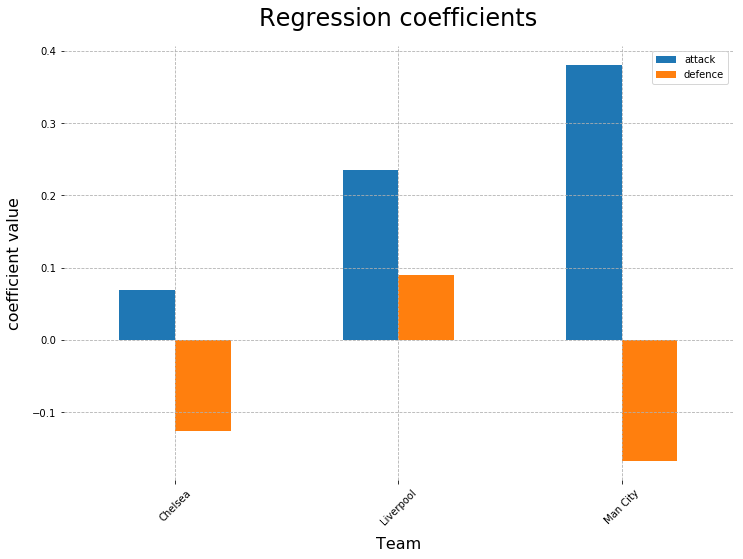

In [291]:
ax = df[df.team.isin(['Man City', 'Liverpool', 'Chelsea'])].plot.bar(rot=45, figsize=(12, 8))
#set title and add grid
ax.set_title("Regression coefficients", fontsize = 24, pad=20)
ax.grid(linestyle = "--")
#disable spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#add axis labels
ax.set_ylabel('coefficient value', fontsize = 16,labelpad=10)
ax.set_xlabel('Team', fontsize = 16, labelpad=10);

In [381]:
# Set teams here
home_team='Chelsea'
away_team='Man City'

#Predict for Chelsea vs. Manchester City
home_score_rate=poisson_model.predict(pd.DataFrame(data={
    'xG': 2.1, 'corners': 5, 'shots': 14, 'shots_ot': 6, 'home':1, 'big_six': 1, 'vs_city_liverpool': 1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={
    'xG': 1.1, 'corners': 5, 'shots': 7, 'shots_ot': 2, 'home':0, 'big_six': 1, 'vs_city_liverpool': 0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

#Lets just get a result
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Chelsea against Man City expect to score: 1    1.670723
dtype: float64
Man City against Chelsea expect to score: 1    1.016915
dtype: float64
Chelsea: 1
Man City: 1


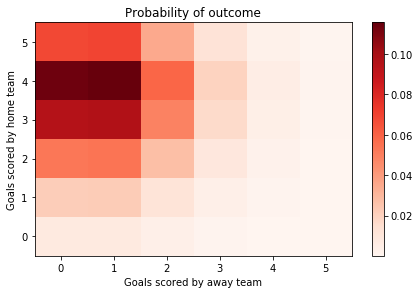

In [382]:
# Code to caluclate the goals for the match.
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={
        'xG': 2.1, 'corners': 5, 'shots': 14, 'shots_ot': 6, 'home':1, 'big_six': 1, 'vs_big_six': 1, 'city_liverpool': 0, 'vs_city_liverpool': 1},index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={
        'xG': 1.1, 'corners': 5, 'shots': 7, 'shots_ot': 2, 'home':0, 'big_six': 1, 'vs_big_six': 1, 'city_liverpool': 1, 'vs_city_liverpool': 0},index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
score_matrix=simulate_match(poisson_model, homeTeam='Chelsea', awayTeam='Man City', max_goals=5)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by away team')
ax.set_ylabel('Goals scored by home team')
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))

In [383]:
print(homewin, draw, awaywin)

0.5193909214197737 0.24306417186986723 0.22951746295722208


In [384]:
home_xPts = (homewin) * 3.0 + (draw) * 1.0 + (awaywin) * 0.0
away_xPts = (awaywin) * 3.0 + (draw) * 1.0 + (homewin) * 0.0

In [385]:
print(home_xPts, away_xPts)

1.8012369361291882 0.9316165607415334


In [ ]:
# basis for the poisson model:
# 1) shots
# 2) shots_ot
# 3) corners
# 4) home
# 5) xG
# 6) SetPiece_xG
# 7) big_six
# 8) vs_city_liverpool

In [1049]:
df_shots = pd.read_csv('../data/Assignment 3/Understat/shots_epl_20-21.csv')

df_shots['h_team'].replace('Manchester United','Man United',inplace=True)
df_shots['h_team'].replace('Newcastle United','Newcastle',inplace=True)
df_shots['h_team'].replace('Manchester City','Man City',inplace=True)
df_shots['h_team'].replace('Wolverhampton Wanderers','Wolves',inplace=True)
df_shots['h_team'].replace('West Bromwich Albion','West Brom',inplace=True)

df_shots['a_team'].replace('Manchester United','Man United',inplace=True)
df_shots['a_team'].replace('Newcastle United','Newcastle',inplace=True)
df_shots['a_team'].replace('Manchester City','Man City',inplace=True)
df_shots['a_team'].replace('Wolverhampton Wanderers','Wolves',inplace=True)
df_shots['a_team'].replace('West Bromwich Albion','West Brom',inplace=True)

df_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,424175.0,3.0,BlockedShot,0.792,0.675,0.023008,Martin Odegaard,h,2517.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass
1,424176.0,5.0,MissedShots,0.714,0.493,0.018891,Thomas Partey,h,2328.0,OpenPlay,2020.0,RightFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Granit Xhaka,Pass
2,424177.0,5.0,SavedShot,0.688,0.435,0.014004,Granit Xhaka,h,204.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Calum Chambers,Pass
3,424178.0,6.0,BlockedShot,0.772,0.359,0.018026,Nicolas Pepe,h,5656.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Pierre-Emerick Aubameyang,Pass
4,424179.0,9.0,BlockedShot,0.787,0.642,0.023655,Martin Odegaard,h,2517.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass


In [1050]:
df_shots.columns

Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction'],
      dtype='object')

In [1005]:
df_shots = df_shots[df_shots.date > '2021-01-24']

In [1051]:
# Total_xG
df_shots = calc_team_xG(df_shots)
# SetPiece_xG
df_shots = calc_team_xG(df_shots, metric='situation', metric_value='SetPiece')

df_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,a_team,h_goals,a_goals,date,player_assisted,lastAction,home_xG,away_xG,home_SetPiece_xG,away_SetPiece_xG
0,424175.0,3.0,BlockedShot,0.792,0.675,0.023008,Martin Odegaard,h,2517.0,OpenPlay,...,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass,0.772904,0.193968,0.0,0.0
1,424176.0,5.0,MissedShots,0.714,0.493,0.018891,Thomas Partey,h,2328.0,OpenPlay,...,Brighton,2.0,0.0,2021-05-23 15:00:00,Granit Xhaka,Pass,0.772904,0.193968,0.0,0.0
2,424177.0,5.0,SavedShot,0.688,0.435,0.014004,Granit Xhaka,h,204.0,OpenPlay,...,Brighton,2.0,0.0,2021-05-23 15:00:00,Calum Chambers,Pass,0.772904,0.193968,0.0,0.0
3,424178.0,6.0,BlockedShot,0.772,0.359,0.018026,Nicolas Pepe,h,5656.0,OpenPlay,...,Brighton,2.0,0.0,2021-05-23 15:00:00,Pierre-Emerick Aubameyang,Pass,0.772904,0.193968,0.0,0.0
4,424179.0,9.0,BlockedShot,0.787,0.642,0.023655,Martin Odegaard,h,2517.0,OpenPlay,...,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass,0.772904,0.193968,0.0,0.0


In [1052]:
epl = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")

df_match = epl[['HomeTeam','AwayTeam','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','FTHG','FTAG','FTR']]
df_match = df_match.rename(columns={
    'HS': 'HomeShots', 'AS': 'AwayShots',
    'HST': 'HomeSoT', 'AST': 'AwaySoT',
    'HC': 'HomeCorners', 'AC': 'AwayCorners',
    'HF': 'HomeFouls', 'AF': 'AwayFouls',
    'HY': 'HomeYellowCards', 'AY': 'AwayYellowCards',
    'HR': 'HomeRedCards', 'AR': 'AwayRedCards',
    'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals',
    'FTR': 'Result'
})

df_match.head()

,HomeTeam,AwayTeam,HomeShots,AwayShots,HomeSoT,AwaySoT,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeGoals,AwayGoals,Result
0,Fulham,Arsenal,5,13,2,6,2,3,12,12,2,2,0,0,0,3,A
1,Crystal Palace,Southampton,5,9,3,5,7,3,14,11,2,1,0,0,1,0,H
2,Liverpool,Leeds,22,6,6,3,9,0,9,6,1,0,0,0,4,3,H
3,West Ham,Newcastle,15,15,3,2,8,7,13,7,2,2,0,0,0,2,A
4,West Brom,Leicester,7,13,1,7,2,5,12,9,1,1,0,0,0,3,A


In [1053]:
df_shots.h_team.unique()

array(['Arsenal', 'Aston Villa', 'Fulham', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Sheffield United', 'West Ham', 'Wolves',
       'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton',
       'Man United', 'Newcastle', 'Southampton', 'Tottenham', 'West Brom'],
      dtype=object)

In [1054]:
df_shots.a_team.unique()

array(['Brighton', 'Chelsea', 'Newcastle', 'West Brom', 'Tottenham',
       'Crystal Palace', 'Everton', 'Burnley', 'Southampton',
       'Man United', 'Man City', 'Liverpool', 'Leicester', 'Arsenal',
       'Wolves', 'Fulham', 'Sheffield United', 'Leeds', 'Aston Villa',
       'West Ham'], dtype=object)

In [1055]:
df_match.HomeTeam.unique()

array(['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 'West Brom',
       'Tottenham', 'Brighton', 'Sheffield United', 'Everton', 'Leeds',
       'Man United', 'Arsenal', 'Southampton', 'Newcastle', 'Chelsea',
       'Leicester', 'Aston Villa', 'Wolves', 'Burnley', 'Man City'],
      dtype=object)

In [1056]:
df_match.AwayTeam.unique()

array(['Arsenal', 'Southampton', 'Leeds', 'Newcastle', 'Leicester',
       'Everton', 'Chelsea', 'Wolves', 'West Brom', 'Fulham',
       'Crystal Palace', 'West Ham', 'Tottenham', 'Brighton', 'Liverpool',
       'Burnley', 'Sheffield United', 'Man City', 'Man United',
       'Aston Villa'], dtype=object)

In [1057]:
merged_df = df_shots.merge(df_match, left_on=['h_team', 'a_team'], right_on=['HomeTeam', 'AwayTeam'])

In [1058]:
merged_df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeGoals,AwayGoals,Result
0,424175.0,3.0,BlockedShot,0.792,0.675,0.023008,Martin Odegaard,h,2517.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H
1,424176.0,5.0,MissedShots,0.714,0.493,0.018891,Thomas Partey,h,2328.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H
2,424177.0,5.0,SavedShot,0.688,0.435,0.014004,Granit Xhaka,h,204.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H
3,424178.0,6.0,BlockedShot,0.772,0.359,0.018026,Nicolas Pepe,h,5656.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H
4,424179.0,9.0,BlockedShot,0.787,0.642,0.023655,Martin Odegaard,h,2517.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H


In [1059]:
pred_data = pd.concat([merged_df[['HomeTeam', 'AwayTeam', 'HomeGoals', 'home_xG', 'home_SetPiece_xG', 'HomeShots', 'HomeSoT', 'HomeCorners']],
                       merged_df[['AwayGoals', 'away_xG', 'away_SetPiece_xG', 'AwayShots', 'AwaySoT', 'AwayCorners']]],
                     axis=1)
pred_data = pred_data.drop_duplicates()

pred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 9207
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomeTeam          380 non-null    object 
 1   AwayTeam          380 non-null    object 
 2   HomeGoals         380 non-null    int64  
 3   home_xG           380 non-null    float64
 4   home_SetPiece_xG  380 non-null    float64
 5   HomeShots         380 non-null    int64  
 6   HomeSoT           380 non-null    int64  
 7   HomeCorners       380 non-null    int64  
 8   AwayGoals         380 non-null    int64  
 9   away_xG           380 non-null    float64
 10  away_SetPiece_xG  380 non-null    float64
 11  AwayShots         380 non-null    int64  
 12  AwaySoT           380 non-null    int64  
 13  AwayCorners       380 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 44.5+ KB


In [1060]:
pred_data.head()

,HomeTeam,AwayTeam,HomeGoals,home_xG,home_SetPiece_xG,HomeShots,HomeSoT,HomeCorners,AwayGoals,away_xG,away_SetPiece_xG,AwayShots,AwaySoT,AwayCorners
0,Arsenal,Brighton,2,0.772904,0.000000,16,5,11,0,0.193968,0.000000,5,1,3
21,Aston Villa,Chelsea,2,0.980413,0.053224,6,3,2,1,3.434139,0.355376,23,7,9
50,Fulham,Newcastle,0,0.990092,0.000000,14,0,5,2,1.601573,0.359375,10,4,4
74,Leeds,West Brom,3,2.499101,0.000000,17,9,8,1,1.022699,0.173948,14,5,3
105,Leicester,Tottenham,2,1.825538,0.000000,10,6,8,4,2.281342,0.000000,11,4,7


In [1061]:
pred_data[(pred_data.HomeTeam == 'Arsenal') & (pred_data.AwayTeam == 'Brighton')]

,HomeTeam,AwayTeam,HomeGoals,home_xG,home_SetPiece_xG,HomeShots,HomeSoT,HomeCorners,AwayGoals,away_xG,away_SetPiece_xG,AwayShots,AwaySoT,AwayCorners
0,Arsenal,Brighton,2,0.772904,0.0,16,5,11,0,0.193968,0.0,5,1,3


In [1062]:
pred_data[(pred_data.AwayTeam == 'Arsenal') & (pred_data.HomeTeam == 'Brighton')]

,HomeTeam,AwayTeam,HomeGoals,home_xG,home_SetPiece_xG,HomeShots,HomeSoT,HomeCorners,AwayGoals,away_xG,away_SetPiece_xG,AwayShots,AwaySoT,AwayCorners
5403,Brighton,Arsenal,0,0.799368,0.0,13,2,5,1,1.315366,0.087758,11,3,4


In [1063]:
epl_sim = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/E0.csv")

epl_sim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


In [1064]:
epl_sim = epl_sim[['HomeTeam','AwayTeam']]

epl_sim.head()

,HomeTeam,AwayTeam
0,Brentford,Arsenal
1,Man United,Leeds
2,Burnley,Brighton
3,Chelsea,Crystal Palace
4,Everton,Southampton


In [1065]:
epl_sim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
dtypes: object(2)
memory usage: 6.1+ KB


In [1066]:
epl_sim_merged = epl_sim.merge(pred_data, left_on=['HomeTeam', 'AwayTeam'], right_on=['HomeTeam', 'AwayTeam'])
epl_sim_merged = epl_sim_merged.drop_duplicates()

In [1067]:
epl_sim_merged

,HomeTeam,AwayTeam,HomeGoals,home_xG,home_SetPiece_xG,HomeShots,HomeSoT,HomeCorners,AwayGoals,away_xG,away_SetPiece_xG,AwayShots,AwaySoT,AwayCorners
0,Man United,Leeds,6,4.807996,0.000000,26,14,11,2,1.634667,0.000000,17,3,13
1,Burnley,Brighton,1,1.956518,0.063480,20,7,8,1,0.612986,0.000000,10,2,7
2,Chelsea,Crystal Palace,4,2.514334,0.059104,17,6,8,0,0.103249,0.018835,4,0,5
3,Everton,Southampton,1,1.420537,0.565374,7,1,4,0,0.701700,0.000000,9,1,10
4,Leicester,Wolves,1,2.054504,0.015982,10,3,6,0,0.579360,0.000000,7,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,Burnley,Newcastle,1,1.843219,0.028049,24,4,13,2,1.342793,0.016648,10,5,3
268,Crystal Palace,Man United,0,0.742397,0.056204,8,2,4,0,0.587530,0.000000,11,1,6
269,Leicester,Southampton,2,2.120194,0.000000,16,5,2,0,0.381003,0.000000,8,3,5
270,Liverpool,Wolves,4,1.594540,0.000000,11,6,4,0,0.357753,0.000000,9,3,6


In [1068]:
epl_sim_merged[epl_sim_merged.HomeTeam == 'Chelsea']

,HomeTeam,AwayTeam,HomeGoals,home_xG,home_SetPiece_xG,HomeShots,HomeSoT,HomeCorners,AwayGoals,away_xG,away_SetPiece_xG,AwayShots,AwaySoT,AwayCorners
2,Chelsea,Crystal Palace,4,2.514334,0.059104,17,6,8,0,0.103249,0.018835,4,0,5
25,Chelsea,Aston Villa,1,1.537010,0.000000,16,5,11,1,0.730859,0.141923,10,2,4
36,Chelsea,Man City,1,0.691013,0.060860,9,2,5,3,3.253769,0.138433,18,6,3
44,Chelsea,Southampton,3,1.987079,0.000000,11,5,6,3,1.423815,0.059431,13,6,2
73,Chelsea,Burnley,2,1.440496,0.000000,19,8,4,0,0.390714,0.000000,1,0,2
91,Chelsea,Man United,0,1.180768,0.039434,18,6,3,0,0.359540,0.031900,11,4,4
108,Chelsea,Leeds,3,5.009607,0.566574,23,11,8,1,1.029992,0.000000,8,3,4
117,Chelsea,Everton,2,2.686461,0.014370,19,9,7,0,0.270757,0.000000,7,1,3
130,Chelsea,Brighton,0,0.807348,0.095853,7,4,0,0,0.460693,0.028813,11,2,3
136,Chelsea,Liverpool,0,0.904183,0.000000,5,3,1,2,2.302193,0.021022,18,6,11


In [1069]:
epl_sim_merged[epl_sim_merged.AwayTeam == 'Chelsea']

,HomeTeam,AwayTeam,HomeGoals,home_xG,home_SetPiece_xG,HomeShots,HomeSoT,HomeCorners,AwayGoals,away_xG,away_SetPiece_xG,AwayShots,AwaySoT,AwayCorners
12,Arsenal,Chelsea,3,1.952749,0.000000,15,7,7,1,2.254139,0.040966,19,3,9
18,Liverpool,Chelsea,0,0.247034,0.000000,7,1,5,1,1.254082,0.000000,11,5,2
35,Tottenham,Chelsea,0,0.569446,0.051665,7,2,2,1,2.396967,0.000000,18,2,7
67,Newcastle,Chelsea,0,0.368286,0.000000,8,1,7,2,1.819228,0.000000,14,3,4
79,Leicester,Chelsea,2,1.144901,0.034601,8,6,6,0,0.615727,0.000000,9,5,3
99,West Ham,Chelsea,0,0.268164,0.050546,9,2,4,1,2.537773,0.022655,17,6,2
121,Wolves,Chelsea,2,0.683783,0.008987,12,4,5,1,1.567717,0.103750,13,3,6
126,Aston Villa,Chelsea,2,0.980413,0.053224,6,3,2,1,3.434139,0.355376,23,7,9
139,Man City,Chelsea,1,1.791682,0.000000,16,4,6,2,0.619724,0.000000,12,5,2
143,Brighton,Chelsea,1,1.443695,0.496133,13,3,4,3,1.270625,0.000000,10,5,3


In [1070]:
epl_sim_merged.columns

Index(['HomeTeam', 'AwayTeam', 'HomeGoals', 'home_xG', 'home_SetPiece_xG',
       'HomeShots', 'HomeSoT', 'HomeCorners', 'AwayGoals', 'away_xG',
       'away_SetPiece_xG', 'AwayShots', 'AwaySoT', 'AwayCorners'],
      dtype='object')

In [991]:
!pip install prettytable

In [992]:
import sys
import math
import time
import pandas as pd
import numpy as np
from prettytable import PrettyTable

In [1071]:
epl_sim_merged.HomeTeam.unique()

array(['Man United', 'Burnley', 'Chelsea', 'Everton', 'Leicester',
       'Newcastle', 'Tottenham', 'Liverpool', 'Aston Villa', 'Leeds',
       'Southampton', 'Wolves', 'Arsenal', 'West Ham', 'Man City',
       'Brighton', 'Crystal Palace'], dtype=object)

In [1072]:
stadium_capacity = {
    'Man United': 74.879,
    'Chelsea': 40.853,
    'Leicester': 32.273,
    'Tottenham': 62.062,
    'Liverpool': 54.074,
    'Aston Villa': 42.682, 
    'Southampton': 32.384,
    'Wolves': 32.050,
    'Arsenal': 60.704,
    'Man City': 55.017,
    'West Ham': 60.000,
    'Crystal Palace': 26.047,
    'Leeds': 37.890, 
    'Brighton': 31.800, 
    'Everton': 39.571,
    'Newcastle': 52.338,
    'Burnley': 21.994
}

In [1128]:
season_home_xPts = dict()
season_away_xPts = dict()

for team in epl_sim_merged.HomeTeam.unique():
    season_home_xPts[team] = 0.00
    season_away_xPts[team] = 0.00

In [1129]:
# sim_goals_df = merged_df[['HomeTeam', 'AwayTeam', 'h_a']].drop_duplicates().reindex(columns=['HomeTeam', 'AwayTeam', 'h_a']+list(range(0,20000)), fill_value=0)
# sim_goals_df = sim_goals_df.reset_index(drop=True)
# sim_goals_df

In [1130]:
for i in range(0, len(epl_sim_merged)):
    print("* Game #", i+1, "*")
    home_team = epl_sim_merged.iloc[i]['HomeTeam']
    away_team = epl_sim_merged.iloc[i]['AwayTeam']
    print("* Home team:", home_team)
    print("* Away team:", away_team)
    
    big_six_teams = ['Arsenal', 'Liverpool', 'Man City', 'Chelsea', 'Man United', 'Tottenham']
    city_liverpool = ['Man City', 'Liverpool']
    input_home_big_six = 0
    if (home_team in (big_six_teams)):
        input_home_big_six = 1
    input_away_big_six = 0
    if (away_team in(big_six_teams)):
        input_away_big_six = 1
    input_home_vs_city_liverpool = 0
    if (away_team in(city_liverpool)):
        input_home_vs_city_liverpool = 1
    input_away_vs_city_liverpool = 0
    if (home_team in(city_liverpool)):
        input_away_vs_city_liverpool = 1
    
    input_home_xG = epl_sim_merged.iloc[i]['home_xG']
    # input_home_xG_scaled = epl_sim_merged.iloc[i]['home_xG'] + (0.01*stadium_capacity[home_team])
    input_home_SetPiece_xG = epl_sim_merged.iloc[i]['home_SetPiece_xG']
    input_home_shots = epl_sim_merged.iloc[i]['HomeShots']
    input_home_shots_ot = epl_sim_merged.iloc[i]['HomeSoT']
    input_home_corners = epl_sim_merged.iloc[i]['HomeCorners']
    input_away_xG = epl_sim_merged.iloc[i]['away_xG']
    input_away_SetPiece_xG = epl_sim_merged.iloc[i]['away_SetPiece_xG']
    input_away_shots = epl_sim_merged.iloc[i]['AwayShots']
    input_away_shots_ot = epl_sim_merged.iloc[i]['AwaySoT']
    input_away_corners = epl_sim_merged.iloc[i]['AwayCorners']
    
    if home_team == 'Chelsea':
        if ~(away_team in big_six_teams):
            input_home_xG = 1.1 * input_home_xG
        input_home_shots_ot = 1.1 * input_home_shots_ot
    if away_team == 'Chelsea':
        if ~(home_team in big_six_teams):
            input_away_xG = 1.1 * input_away_xG
        input_away_shots_ot = 1.1 * input_away_shots_ot
    
    home_goals_avg = poisson_model.predict(pd.DataFrame(data={
        'xG': input_home_xG, 'SetPiece_xG': input_home_SetPiece_xG, 'shots': input_home_shots, 'shots_ot': input_home_shots_ot, 'corners': input_home_corners,
        'home':1, 'big_six': input_home_big_six, 'vs_city_liverpool': input_home_vs_city_liverpool},index=[1])).values[0]
    away_goals_avg = poisson_model.predict(pd.DataFrame(data={
        'xG': input_away_xG, 'SetPiece_xG': input_away_SetPiece_xG, 'shots': input_away_shots, 'shots_ot': input_away_shots_ot, 'corners': input_away_corners,
        'home':0, 'big_six': input_away_big_six, 'vs_city_liverpool': input_away_vs_city_liverpool},index=[1])).values[0]
    print(home_goals_avg, away_goals_avg)
    
    count_home_wins = 0
    count_home_loss = 0
    count_away_wins = 0
    count_away_loss = 0
    count_draws = 0
    score_mat = []
    tot_sim_time = 0
    num_simulations = 10000
    # sim_table = PrettyTable(["SIMULATION #", "SIMULATION TIME (s)", home_team, away_team, "HOME WIN", "AWAY WIN", "DRAW", "SCORE MARGIN"])
    for j in range(num_simulations):
        start_time = time.time()
        target_home_goals_scored = np.random.poisson(home_goals_avg)
        target_away_goals_scored = np.random.poisson(away_goals_avg)
        # print(target_home_goals_scored, target_away_goals_scored)
        home_win = 0
        away_win = 0
        draw = 0
        margin = 0
        # if more goals for home team => home team wins
        if target_home_goals_scored > target_away_goals_scored:
            count_home_wins += 1
            count_away_loss += 1
            home_win = 1
            margin = target_home_goals_scored - target_away_goals_scored
        # if more goals for away team => away team wins
        elif target_home_goals_scored < target_away_goals_scored:
            count_away_wins += 1
            count_home_loss += 1
            away_win = 1
            margin = target_away_goals_scored - target_home_goals_scored
        elif target_home_goals_scored == target_away_goals_scored:
            draw = 1
            count_draws += 1
            margin = target_away_goals_scored - target_home_goals_scored
        # add score to score matrix
        score_mat.append((target_home_goals_scored, target_away_goals_scored))
        #get end time
        end_time = time.time()
        #add the time to the total simulation time
        tot_sim_time += round((end_time - start_time),5)
        
        # sim_goals_df[(sim_goals_df.HomeTeam == home_team) & (sim_goals_df.AwayTeam == away_team) & (sim_goals_df.h_a == 'h')][j] = target_home_goals_scored
        # sim_goals_df[(sim_goals_df.HomeTeam == home_team) & (sim_goals_df.AwayTeam == away_team) & (sim_goals_df.h_a == 'a')][j] = target_away_goals_scored
        # sim_goals_df.loc[(sim_goals_df.HomeTeam == home_team) & (sim_goals_df.AwayTeam == away_team) & (sim_goals_df.h_a == 'h'),j] = target_home_goals_scored
        # sim_goals_df.loc[(sim_goals_df.HomeTeam == home_team) & (sim_goals_df.AwayTeam == away_team) & (sim_goals_df.h_a == 'a'),j] = target_away_goals_scored
        
        #add the info to the simulation table
        # sim_table.add_row([i+1, round((end_time - start_time),5), target_home_goals_scored, target_away_goals_scored, home_win, away_win, draw, margin])
    # print(sim_table)
    home_win_probability = round((count_home_wins/num_simulations * 100),2)
    away_win_probability = round((count_away_wins/num_simulations * 100),2)
    draw_probability = round((count_draws/num_simulations * 100),2)
    
    # print the simulation statistics
    # print ("*************")
    # print ("*           *")
    # print ("* SIM STATS *")
    # print ("*           *")
    # print ("*************")
    # sim_table_stats = PrettyTable(["Total # of sims", "Total time (s) for sims", "HOME WINS", "AWAY WINS", "DRAWS"])
    # sim_table_stats.add_row([num_simulations, round(tot_sim_time,3), count_home_wins, count_away_wins, count_draws])
    # sim_table_stats.add_row(["-", "-", str(home_win_probability)+"%", str(away_win_probability)+"%", str(draw_probability)+"%"])
    # print(sim_table_stats)
    
    # total_scores = len(score_mat)
    # max_score = 5
    # assemble_scores = [[0 for x in range(max_score)] for y in range(max_score)]
    # for i in range(total_scores):
    #     if score_mat[i][0] == 0 and score_mat[i][1] == 0:
    #         assemble_scores[0][0] += 1
    #     elif score_mat[i][0] == 0 and score_mat[i][1] == 1:
    #         assemble_scores[0][1] += 1
    #     elif score_mat[i][0] == 0 and score_mat[i][1] == 2:
    #         assemble_scores[0][2] += 1     
    #     elif score_mat[i][0] == 0 and score_mat[i][1] == 3:
    #         assemble_scores[0][3] += 1     
    #     elif score_mat[i][0] == 0 and score_mat[i][1] == 4:
    #         assemble_scores[0][4] += 1    
    #     elif score_mat[i][0] == 1 and score_mat[i][1] == 0:
    #         assemble_scores[1][0] += 1
    #     elif score_mat[i][0] == 1 and score_mat[i][1] == 1:
    #         assemble_scores[1][1] += 1     
    #     elif score_mat[i][0] == 1 and score_mat[i][1] == 2:
    #         assemble_scores[1][2] += 1     
    #     elif score_mat[i][0] == 1 and score_mat[i][1] == 3:
    #         assemble_scores[1][3] += 1     
    #     elif score_mat[i][0] == 1 and score_mat[i][1] == 4:
    #         assemble_scores[1][4] += 1
    #     elif score_mat[i][0] == 2 and score_mat[i][1] == 0:
    #         assemble_scores[2][0] += 1
    #     elif score_mat[i][0] == 2 and score_mat[i][1] == 1:
    #         assemble_scores[2][1] += 1     
    #     elif score_mat[i][0] == 2 and score_mat[i][1] == 2:
    #         assemble_scores[2][2] += 1     
    #     elif score_mat[i][0] == 2 and score_mat[i][1] == 3:
    #         assemble_scores[2][3] += 1     
    #     elif score_mat[i][0] == 2 and score_mat[i][1] == 4:
    #         assemble_scores[2][4] += 1
    #     elif score_mat[i][0] == 3 and score_mat[i][1] == 0:
    #         assemble_scores[3][0] += 1
    #     elif score_mat[i][0] == 3 and score_mat[i][1] == 1:
    #         assemble_scores[3][1] += 1     
    #     elif score_mat[i][0] == 3 and score_mat[i][1] == 2:
    #         assemble_scores[3][2] += 1     
    #     elif score_mat[i][0] == 3 and score_mat[i][1] == 3:
    #         assemble_scores[3][3] += 1     
    #     elif score_mat[i][0] == 3 and score_mat[i][1] == 4:
    #         assemble_scores[3][4] += 1            
    #     elif score_mat[i][0] == 4 and score_mat[i][1] == 0:
    #         assemble_scores[4][0] += 1
    #     elif score_mat[i][0] == 4 and score_mat[i][1] == 1:
    #         assemble_scores[4][1] += 1     
    #     elif score_mat[i][0] == 4 and score_mat[i][1] == 2:
    #         assemble_scores[4][2] += 1     
    #     elif score_mat[i][0] == 4 and score_mat[i][1] == 3:
    #         assemble_scores[4][3] += 1     
    #     elif score_mat[i][0] == 4 and score_mat[i][1] == 4:
    #         assemble_scores[4][4] += 1     

    #calculate percentages and print the score matrix
    # print ("**********************************")        
    # print ("*                                *")       
    # print ("*  SCORE MATRIX (% PROBABILITY)  *")
    # print ("*                                *")
    # print ("**********************************")
    # score_matrix = PrettyTable([" ", 0, 1, 2, 3, 4])
    # score_matrix.add_row([0,round(assemble_scores[0][0]/num_simulations*100,2),round(assemble_scores[0][1]/num_simulations*100,2),
    #                       round(assemble_scores[0][2]/num_simulations*100,2),round(assemble_scores[0][3]/num_simulations*100,2),round(assemble_scores[0][4]/num_simulations*100,2)])
    # score_matrix.add_row([1,round(assemble_scores[1][0]/num_simulations*100,2),round(assemble_scores[1][1]/num_simulations*100,2),
    #                       round(assemble_scores[1][2]/num_simulations*100,2),round(assemble_scores[1][3]/num_simulations*100,2),round(assemble_scores[1][4]/num_simulations*100,2)])
    # score_matrix.add_row([2,round(assemble_scores[2][0]/num_simulations*100,2),round(assemble_scores[2][1]/num_simulations*100,2),
    #                       round(assemble_scores[2][2]/num_simulations*100,2),round(assemble_scores[2][3]/num_simulations*100,2),round(assemble_scores[2][4]/num_simulations*100,2)])
    # score_matrix.add_row([3,round(assemble_scores[3][0]/num_simulations*100,2),round(assemble_scores[3][1]/num_simulations*100,2),
    #                       round(assemble_scores[3][2]/num_simulations*100,2),round(assemble_scores[3][3]/num_simulations*100,2),round(assemble_scores[3][4]/num_simulations*100,2)])
    # score_matrix.add_row([4,round(assemble_scores[4][0]/num_simulations*100,2),round(assemble_scores[4][1]/num_simulations*100,2),
    #                       round(assemble_scores[4][2]/num_simulations*100,2),round(assemble_scores[4][3]/num_simulations*100,2),round(assemble_scores[4][4]/num_simulations*100,2)])
    # # print(score_matrix) 
    
    #calculate expected Pts and print a summary
    home_xPts = (home_win_probability / 100) * 3.0 + (draw_probability / 100) * 1.0 + (away_win_probability / 100) * 0.0
    away_xPts = (away_win_probability / 100) * 3.0 + (draw_probability / 100) * 1.0 + (home_win_probability / 100) * 0.0
    season_home_xPts[home_team] += round(home_xPts,2)
    season_away_xPts[away_team] += round(away_xPts,2)
    # print ("**********************************")        
    # print ("*                                *")       
    # print ("*             SUMMARY            *")
    # print ("*                                *")
    # print ("**********************************")
    print(home_team, "win probability %:", home_win_probability, "xPts =", round(home_xPts,2))
    print(away_team, "win probability %:", away_win_probability, "xPts =", round(away_xPts,2))
    print("Draw probability %:", draw_probability)

* Game # 1 *
* Home team: Man United
* Away team: Leeds
9.589936164516448 0.6410533707702508
Man United win probability %: 99.85 xPts = 3.0
Leeds win probability %: 0.04 xPts = 0.0
Draw probability %: 0.11
* Game # 2 *
* Home team: Burnley
* Away team: Brighton
1.4941101935344405 0.5966547845525378
Burnley win probability %: 59.6 xPts = 2.05
Brighton win probability %: 14.58 xPts = 0.7
Draw probability %: 25.82
* Game # 3 *
* Home team: Chelsea
* Away team: Crystal Palace
2.5653776414496345 0.5001200497337408
Chelsea win probability %: 82.25 xPts = 2.6
Crystal Palace win probability %: 4.86 xPts = 0.27
Draw probability %: 12.89
* Game # 4 *
* Home team: Everton
* Away team: Southampton
0.935338361990314 0.5152310668528758
Everton win probability %: 44.25 xPts = 1.69
Southampton win probability %: 19.38 xPts = 0.95
Draw probability %: 36.37
* Game # 5 *
* Home team: Leicester
* Away team: Wolves
1.3661758808075453 0.7312798601220659
Leicester win probability %: 51.43 xPts = 1.83
Wolves 

In [1131]:
season_home_xPts

{'Man United': 28.060000000000002,
 'Burnley': 19.099999999999998,
 'Chelsea': 33.17,
 'Everton': 22.390000000000004,
 'Leicester': 20.930000000000003,
 'Newcastle': 22.25,
 'Tottenham': 29.700000000000003,
 'Liverpool': 31.099999999999994,
 'Aston Villa': 23.11,
 'Leeds': 24.24,
 'Southampton': 21.17,
 'Wolves': 20.860000000000003,
 'Arsenal': 24.549999999999997,
 'West Ham': 23.68,
 'Man City': 34.019999999999996,
 'Brighton': 24.19,
 'Crystal Palace': 18.45}

In [1132]:
season_away_xPts

{'Man United': 27.279999999999998,
 'Burnley': 15.78,
 'Chelsea': 27.48,
 'Everton': 19.790000000000003,
 'Leicester': 19.680000000000003,
 'Newcastle': 14.23,
 'Tottenham': 18.590000000000003,
 'Liverpool': 27.35000000000001,
 'Aston Villa': 17.56,
 'Leeds': 15.400000000000002,
 'Southampton': 12.959999999999999,
 'Wolves': 14.69,
 'Arsenal': 20.1,
 'West Ham': 19.729999999999993,
 'Man City': 28.869999999999997,
 'Brighton': 16.360000000000003,
 'Crystal Palace': 13.770000000000001}

In [1133]:
points_home = pd.DataFrame.from_dict(season_home_xPts, orient='index').rename(columns={0: 'Home_scenario3'})
points_away = pd.DataFrame.from_dict(season_away_xPts, orient='index').rename(columns={0: 'Away_scenario3'})

In [1136]:
all_scenarios = pd.concat([all_scenarios, points_away], axis=1)

In [1137]:
all_scenarios

,Home_Lampard,Away_Lampard,Home_Tuchel,Away_Tuchel,Home_Base,Away_Base,Home_xG_scaled,Away_xG_scaled,Home_scenario1,Away_scenario1,Home_scenario2,Away_scenario2,Home_scenario3,Away_scenario3
Man United,14.39,13.74,16.88,11.91,28.16,27.45,31.31,25.64,28.07,27.40,28.19,27.42,28.06,27.28
Chelsea,15.84,10.56,17.46,13.43,31.44,25.62,33.25,23.85,32.27,26.40,32.41,26.64,33.17,27.48
Leicester,13.06,8.52,9.56,9.50,21.15,19.79,22.64,18.07,21.00,19.67,21.04,19.85,20.93,19.68
Tottenham,17.74,8.50,14.76,8.24,29.81,18.69,32.65,16.73,29.79,18.67,29.80,18.72,29.70,18.59
Liverpool,18.87,11.39,14.78,14.30,31.20,27.24,33.65,25.77,31.16,27.27,31.15,27.30,31.10,27.35
Aston Villa,14.19,6.01,10.92,9.74,23.28,17.61,25.10,15.82,23.19,17.59,23.16,17.54,23.11,17.56
Southampton,10.20,6.89,12.55,4.45,21.14,13.09,22.76,11.32,21.10,12.96,21.05,13.07,21.17,12.96
Wolves,12.06,6.74,10.14,6.51,20.89,14.92,22.28,13.33,20.83,14.82,20.84,14.79,20.86,14.69
Arsenal,16.81,7.05,10.74,11.16,24.65,20.14,27.49,18.18,24.56,20.08,24.61,20.08,24.55,20.10
Man City,18.37,11.63,18.09,15.69,34.08,28.82,36.42,27.26,34.10,28.84,33.97,28.80,34.02,28.87
